In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train.shape 

(60000, 28, 28)

In [7]:
# Convolution expects NxHxWxC

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
# Number of classes

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_train[0].shape

(28, 28, 1)

In [11]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [12]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 70s 21ms/step - loss: 0.5376 - accuracy: 0.8078 - val_loss: 0.3184 - val_accuracy: 0.8843
Epoch 2/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3305 - accuracy: 0.8815 - val_loss: 0.3100 - val_accuracy: 0.8914
Epoch 3/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2925 - accuracy: 0.8955 - val_loss: 0.2710 - val_accuracy: 0.9045
Epoch 4/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2616 - accuracy: 0.9056 - val_loss: 0.3037 - val_accuracy: 0.9038
Epoch 5/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2467 - accuracy: 0.9105 - val_loss: 0.2538 - val_accuracy: 0.9196
Epoch 6/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2290 - accuracy: 0.9181 - val_loss: 0.2712 - val_accuracy: 0.9147
Epoch 7/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2198 - accuracy: 0.9205 - val_loss: 0.2722 -

Observation:

We are getting a Overfitting Model and Using Some More Hyper Parameters we are going to Will Try.

In [15]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3433 - accuracy: 0.8803 - val_loss: 0.2408 - val_accuracy: 0.9307
Epoch 2/50
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2782 - accuracy: 0.9005 - val_loss: 0.2381 - val_accuracy: 0.9301
Epoch 3/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2627 - accuracy: 0.9053 - val_loss: 0.2329 - val_accuracy: 0.9325
Epoch 4/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2511 - accuracy: 0.9095 - val_loss: 0.2683 - val_accuracy: 0.9168
Epoch 5/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2451 - accuracy: 0.9116 - val_loss: 0.2494 - val_accuracy: 0.9313
Epoch 6/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2392 - accuracy: 0.9121 - val_loss: 0.2234 - val_accuracy: 0.9323
Epoch 7/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2347 - accuracy: 0.9151 - val_loss: 0.2381 -

Observation:

We are getting a lower training accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

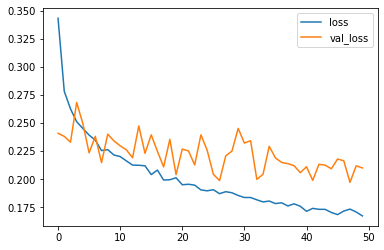

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Observation:

A much better learning curve than before.

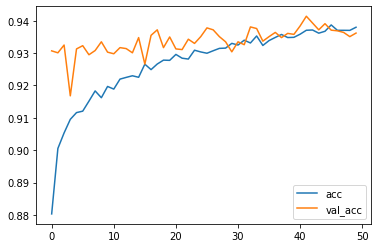

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[860   1  15  16   4   1  97   0   5   1]
 [  0 992   0   6   0   0   0   0   2   0]
 [ 13   0 909   8  33   0  37   0   0   0]
 [  4   5   9 945  19   0  17   0   1   0]
 [  1   1  21  17 917   0  42   0   1   0]
 [  0   0   0   0   0 990   0   8   0   2]
 [ 82   0  37  20  44   0 815   0   2   0]
 [  0   0   0   0   0   6   0 983   0  11]
 [  1   1   0   1   1   2   2   0 992   0]
 [  0   0   0   0   0   6   0  35   0 959]]


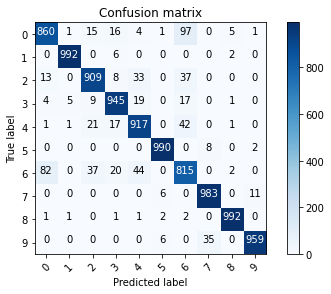

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



bservation: Much lesser misclassifications as promised before.

Lets check the two most wrong predictions.

a. True Label = 0, Predicted Label = 6, Value = 97

b. True Label = 6, Predicted Label = 0, Value = 82


So, in 'a' and 'b', 0 and 6 are getting confused very often, i.e. the T-shirt/top and Shirts are getting confused very often. And that does make sense to me because the images are so small that its easy to confuse a T-shirt/top with a Shirt.


In [23]:
# Label mapping
labels = '''T-shirt/top
            Trouser
            Pullover
            Dress
            Coat
            Sandal
            Shirt
            Sneaker
            Bag
            Ankle boot'''.split("\n")
labels

['T-shirt/top',
 '            Trouser',
 '            Pullover',
 '            Dress',
 '            Coat',
 '            Sandal',
 '            Shirt',
 '            Sneaker',
 '            Bag',
 '            Ankle boot']

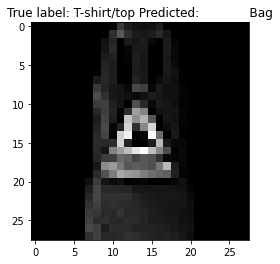

In [24]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

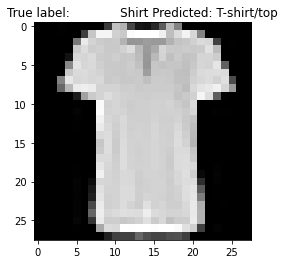

In [25]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()